# <span style="color:red"> **Framework components** </span>

### <span style="color:purple"> The field </span>
    An empty grid
    Can be any shape

### <span style="color:purple"> The target  </span>
    Randomly placed on the grid at the beginning of each scenario (unless otherwise specified)
    Cannot move (unless otherwise specified)
    Can be detected by the robots within their detection range


### <span style="color:purple"> The command center </span> : 
    Placed at (0,0) at the beginning of each scenario (unless otherwise specified)
    Cannot move (unless otherwise specified)
    Can receive message (ex : transmission of the target's position) from robots when they are close enough (transmission range)

### <span style="color:purple"> Robots </span>: 
    Know their position on the grid
    Randomly placed on the grid at the beginning of each scenario
    Can move in of these 8 directions : "up", "down", "left", "right", "up right", "up left", "down right", "down left"
    Explore the site in search of the target while staying within the grid and avoiding collisions
    Can see the target when it is within their detection range
    Move towards the command center to transmit the target's position once they have found it
    Can communicate with each other and the command center within their transmission range


# <span style="color:red"> **Framework code** </span>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random

In [2]:
def place_robots(num_robots, specified_positions=None, grid_size=(20, 20)):
    
    
    grid = np.full(grid_size, None, dtype=object)

    
    # Placer un centre de commandement à la position (1, 1)
    grid[0, 0] = -1  # Réassigner -1 pour le centre de commandement

    
    # Si des positions spécifiées sont fournies, les utiliser ; sinon, générer des positions aléatoires
    if specified_positions is not None and len(specified_positions) == num_robots:
        robot_positions = specified_positions
    else:
        # Générer toutes les positions uniques possibles
        all_positions = np.array(np.meshgrid(range(1, grid_size[0]), range(1, grid_size[1]))).T.reshape(-1, 2)

        
        # Sélectionner aléatoirement des positions uniques pour les robots
        robot_positions = all_positions[np.random.choice(len(all_positions), size=num_robots, replace=False)]
        

    # Assigner les noms des robots à leurs positions
    robot_names = np.arange(1, num_robots + 1)

    
    
    for position, name in zip(robot_positions, robot_names):
        grid[position[0], position[1]] = name

        
        
    # Générer une position aléatoire pour la croix rouge, en veillant à ce qu'elle ne soit pas à la même position qu'un robot
    while True:
        red_cross_position = np.random.choice(range(1, grid_size[0]), size=2)
        if grid[red_cross_position[0], red_cross_position[1]] is None:
            break

    # Convertir les valeurs 'None' en un type numérique (par exemple, 0)
    grid_numeric = np.zeros_like(grid, dtype=int)
    grid_numeric[grid == -1] = -1  # Réassigner -1 pour le centre de commandement

    
    # Afficher les robots sur la carte
    for i in range(1, num_robots + 1):
        grid_numeric[grid == i] = i

    
    grid_numeric[red_cross_position[0], red_cross_position[1]] = -2

    return grid_numeric, red_cross_position, grid_size





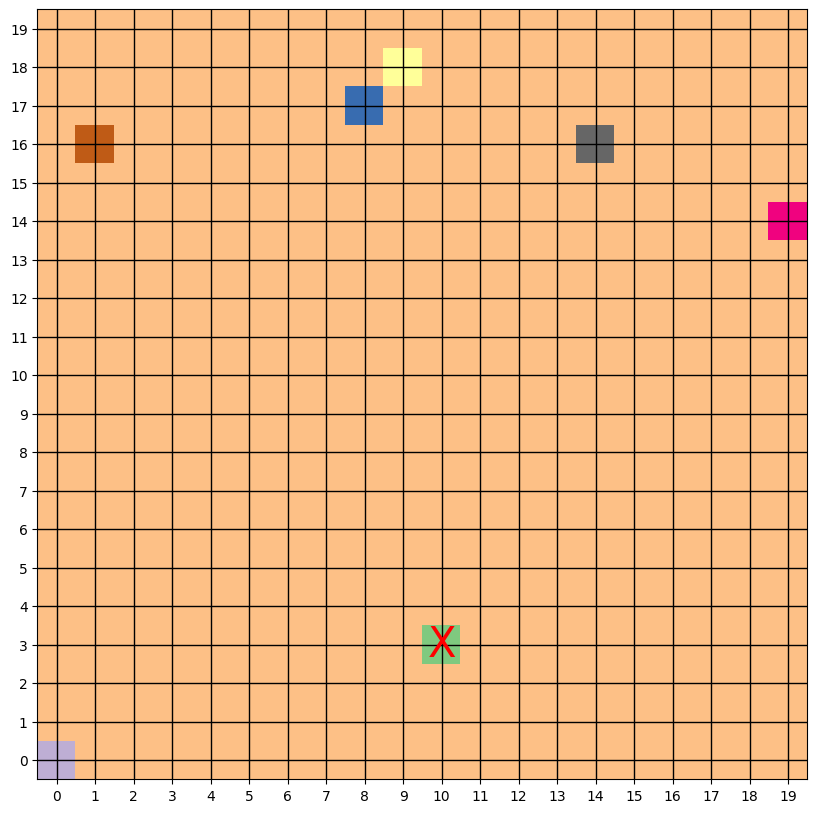



Robots Initial positions :  [array([ 9, 18]), array([ 8, 17]), array([19, 14]), array([ 1, 16]), array([14, 16])]


Target position : 10,3


In [3]:
#
#

specified_positions = []
num_robots = 5

    
grid_result, red_cross_position, grid_size = place_robots(num_robots, specified_positions, grid_size=(20, 20))


fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(grid_result, cmap='Accent', origin='lower', extent=[0, grid_size[0], 0, grid_size[1]])


# Add grid lines for better visualization (optional)
plt.grid(True, which='both', color='black', linewidth=1)


# Set axis ticks and labels in the center of squares
plt.xticks(np.arange(0.5, grid_size[0] + 0.5, 1), np.arange(0, grid_size[0], 1))
plt.yticks(np.arange(0.5, grid_size[1] + 0.5, 1), np.arange(0, grid_size[1], 1))



# Display the red cross on the plot
plt.text(red_cross_position[1] + 0.5, red_cross_position[0] + 0.5, 'X', fontsize=30, color='r', ha='center', va='center')

# Show the plot in a pop-up window
plt.show(block=True)
print("\n") 


# Robots initial positions

pos_init = []
for robot in range(1, num_robots + 1):
    pos_init.append(np.argwhere(grid_result == robot)[0])

current_positions = [pos_init[robot][::-1] for robot in range(num_robots)]
print("Robots Initial positions : ", current_positions)
print("\n")  


# Target position
print("Target position : {},{}".format(red_cross_position[1], red_cross_position[0]))